OrthoFinder assigned 140715 genes (87.6% of total) to 16922 orthogroups. Fifty percent of all genes were in orthogroups with 12 or more genes (G50 was 12) and were contained in the largest 3209 orthogroups (O50 was 3209). There were 6776 orthogroups with all species present and 1585 of these consisted entirely of single-copy genes.

2025-06-30 23:41:06 : Done orthogroups

Results:
    /data/jwd05e/main/085/425/85425726/working/OrthoFinder/Results_Jun30/

CITATION:
 When publishing work that uses OrthoFinder please cite:
 Emms D.M. & Kelly S. (2019), Genome Biology 20:238

 If you use the species tree in your work then please also cite:
 Emms D.M. & Kelly S. (2017), MBE 34(12): 3267-3278
 Emms D.M. & Kelly S. (2018), bioRxiv https://doi.org/10.1101/267914


In [32]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Cargar Archivos
OrthG=pd.read_csv('orthogroups (tsv).tsv',sep='\t',dtype=str)
genes=pd.read_csv('genes.tsv',sep='\t',dtype=str)
Estadisticas=pd.read_csv('per species comparative genomics statistics.tsv',sep='\t',dtype=str)
genh=pd.read_csv('ncbi_dataset.tsv',sep='\t',dtype=str)

#limpiar datos de genes
  #All sequence per gen
genes.drop(labels=['Accession','Begin','End','Chromosome','Orientation','Symbol',
                   'Gene Type','Transcripts accession','Transcript name',
                   'Protein name','Protein length','Locus tag'],axis=1,inplace=True)
  #One sequences per gen
genh.drop(labels=['Accession','Begin','End','Chromosome','Orientation','Symbol',
                  'Gene Type','Transcripts accession','Protein length','Locus tag'],
                    axis=1,inplace=True)

#Trabajar con estadisticas
Estadisticas.rename(columns={'Unnamed: 0':'Parámetro','Dlaeve_longestOrfs.good.faa':'Babosa','proteoma_humano.faa':'Humanos'},inplace=True)
Estadisticas=Estadisticas.head(10)
  #Obtener estadisticas de los genes Humanos
    #Number of genes
Estadisticas.loc[0,'Humanos']=len(genh)
    #Number of genes in orthogroups
genH_in_OG = OrthG[['Orthogroup','proteoma_humano.faa']]
genH_in_OG.dropna(subset=['proteoma_humano.faa'], inplace=True)
no_de_OG=len(genH_in_OG)
for i in genH_in_OG.index:
  temp = genH_in_OG.loc[i, 'proteoma_humano.faa']
  if isinstance(temp, str):
    genH_in_OG.loc[i, 'proteoma_humano.faa'] = temp.split(', ')
  else:
    genH_in_OG.loc[i, 'proteoma_humano.faa'] = []
genH_in_OG_exploded = genH_in_OG.explode('proteoma_humano.faa')
genH_in_OG=genH_in_OG_exploded.merge(genes, left_on='proteoma_humano.faa', right_on='Protein accession', how='left')
genH_in_OG.drop_duplicates(subset=['Gene ID','Name'],inplace=True)
genH_in_OG.reset_index(drop=True,inplace=True)
Estadisticas.loc[1,'Humanos']=len(genH_in_OG)
    #Number of unassigned genes
Estadisticas.loc[2,'Humanos']=len(genh)-len(genH_in_OG)
    #Percentage of genes in orthogroups
Estadisticas.loc[3,'Humanos']=round((len(genH_in_OG)/len(genh))*100,1)
    #Percentage of unassigned genes
Estadisticas.loc[4,'Humanos']=round(((len(genh)-len(genH_in_OG))/len(genh))*100,1)
    #Number of orthogroups containing species
Estadisticas.loc[5,'Humanos']=no_de_OG
    #Percentage of orthogroups containing species
Estadisticas.loc[6,'Humanos']=round((no_de_OG/len(OrthG))*100,1)
    #Number of species-specific orthogroups
OrthG.dropna(inplace=True)
no_de_OG_c=len(OrthG)
Estadisticas.loc[7,'Humanos']=no_de_OG-no_de_OG_c
    #Number of genes in species-specific orthogroups
for i in OrthG.index:
  PH = OrthG.loc[i,'proteoma_humano.faa']
  PD = OrthG.loc[i,'Dlaeve_longestOrfs.good.faa']
  if isinstance(PH, str):
    OrthG.loc[i,'proteoma_humano.faa'] = PH.split(', ')
  else:
    OrthG.loc[i,'proteoma_humano.faa'] = []
  if isinstance(PD, str):
    OrthG.loc[i,'Dlaeve_longestOrfs.good.faa'] = PD.split(', ')
  else:
    OrthG.loc[i,'Dlaeve_longestOrfs.good.faa']=[]
OrthG_exploded = OrthG.explode('Dlaeve_longestOrfs.good.faa').explode('proteoma_humano.faa')
ProGen = OrthG_exploded.merge(genes, left_on='proteoma_humano.faa', right_on='Protein accession', how='left')
ProGen.drop('Protein accession',axis=1,inplace=True)
ProGen.drop_duplicates(subset=['Gene ID','Orthogroup','Name'],inplace=True)
ProGen.reset_index(drop=True,inplace=True)
Estadisticas.loc[8,'Humanos']=len(genH_in_OG)-len(ProGen)
#Percentage of genes in species-specific orthogroups
Estadisticas.loc[9,'Humanos']=round(((len(genH_in_OG)-len(ProGen))/len(genH_in_OG))*100,1)
ProGen.to_csv('GenesCompartidos.csv',index=False)
Estadisticas.to_csv('Estadisticas.csv',index=False)


In [33]:
data = {
        'U':['Genes','Genes','Genes','Genes','Genes','Genes'],
        'Species': ['humano','humano','humano','babosa','babosa','babosa'],
        'Orthogroup':['In orthogroups','In orthogroups','Unassigned','In orthogroups','In orthogroups','Unassigned'],
        'Species.specific':['Species-specific Orthogroups','Shared Orthogroups','','Species-specific Orthogroups','Shared Orthogroups',''],
        'Genes': [10563,17991-10563,5321,9592,18637-9592,5700],
        'Cantidad de ortogrupos': [2468,9244-2468,0,7678,14454-7678,0]
}
df=pd.DataFrame(data)
fig = px.treemap(df,
                     path=['U','Species', 'Orthogroup','Species.specific'],
                     values='Genes',
                     title='Comparación genómica',
                     color='Cantidad de ortogrupos',
                     color_continuous_scale='Earth',
                     hover_data={'Cantidad de ortogrupos': ':,', 'Genes': ':,'}
                    )
fig.update_traces(marker=dict(cornerradius=5))
fig.update_layout(
    font_size=12,
    width=850,
    height=600,
    title_x=0.5,
    margin=dict(t=30, l=0, r=0, b=0)  # Ajustar márgenes para mejor apariencia
)
plt.savefig('treemap.png',
            dpi=300,                    # Alta resolución
            bbox_inches='tight',        # Recortar espacios en blanco
            facecolor='white',          # Fondo blanco
            edgecolor='none')
fig.show()

<Figure size 640x480 with 0 Axes>

In [34]:
numeric_params = Estadisticas[Estadisticas['Parámetro'].str.contains('Number')]
numeric_params[['Humanos','Babosa']] = numeric_params[['Humanos','Babosa']].astype(float)
percent_params = Estadisticas[Estadisticas['Parámetro'].str.contains('Percentage')]
percent_params[['Humanos','Babosa']] = percent_params[['Humanos','Babosa']].astype(float)

In [35]:
fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=('Valores Absolutos', 'Porcentajes'),
        vertical_spacing=0.15,
        row_heights=[0.6, 0.4]
    )
for species in ['Babosa', 'Humanos']:
        fig.add_trace(
            go.Bar(
                y=numeric_params['Parámetro'],
                x=numeric_params[species],
                name=species,
                marker_color='lightblue' if species == 'Babosa' else 'lightcoral',
                orientation='h',
                showlegend=True
            ),
            row=1, col=1
        )
for species in ['Babosa', 'Humanos']:
        fig.add_trace(
            go.Bar(
                y=percent_params['Parámetro'],
                x=percent_params[species],
                name=species,
                marker_color='lightblue' if species == 'Babosa' else 'lightcoral',
                orientation='h',
                showlegend=False
            ),
            row=2, col=1
        )

fig.update_layout(
        title='Comparación Genómica: Babosa vs Humanos',
        height=800,
        width=1200,
        barmode='group',
        showlegend=True,
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
    )
plt.savefig('BarComparative.png',
            dpi=300,
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')
fig.show()

<Figure size 640x480 with 0 Axes>

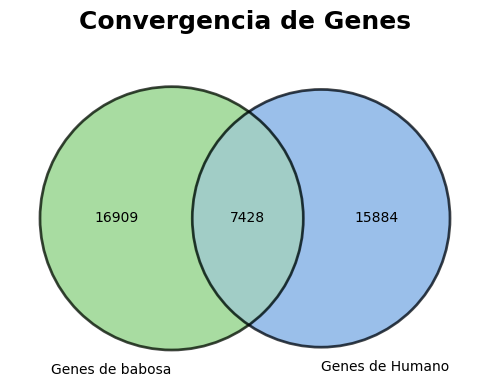

In [36]:
    # Calcular genes únicos de cada grupo
grupo1_total=int(Estadisticas.loc[0,"Babosa"])
grupo2_total=int(Estadisticas.loc[0,"Humanos"])
genes_compartidos = len(ProGen)
grupo1_unico = grupo1_total - genes_compartidos
grupo2_unico = grupo2_total - genes_compartidos

    # Crear figura
fig, ax = plt.subplots(figsize=(5, 4))

    # Crear el diagrama de Venn
venn=venn2(subsets=(grupo1_unico, grupo2_unico, genes_compartidos),
                 set_labels=('Genes de babosa', 'Genes de Humano'),
                 ax=ax)

    # Personalizar colores
venn.get_patch_by_id('10').set_color('#26A816')
venn.get_patch_by_id('01').set_color('#0460CC')
venn.get_patch_by_id('11').set_color('#158471')

    # Añadir círculos con bordes
venn_circles = venn2_circles(subsets=(grupo1_unico, grupo2_unico, genes_compartidos))
for circle in venn_circles:
        circle.set_linewidth(2)
        circle.set_edgecolor('black')
        circle.set_alpha(0.7)

    # Personalizar texto
for text in venn.set_labels:
        text.set_fontsize(10)

for text in venn.subset_labels:
        if text:
            text.set_fontsize(10)

    # Título y formato
plt.title('Convergencia de Genes', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()

plt.savefig('venn_diagram_genes.png',
            dpi=300,                    # Alta resolución
            bbox_inches='tight',        # Recortar espacios en blanco
            facecolor='white',          # Fondo blanco
            edgecolor='none')


In [37]:
Estadisticas
display(ProGen)

,Orthogroup,Dlaeve_longestOrfs.good.faa,proteoma_humano.faa,Name,Gene ID
0,OG0000008,evm.model.HiC_scaffold_16.597,NP_001336383.1,small nuclear ribonucleoprotein polypeptide N,6638
1,OG0000008,evm.model.HiC_scaffold_16.597,NP_003082.1,small nuclear ribonucleoprotein polypeptides B...,6628
2,OG0000014,evm.model.HiC_scaffold_5.902,NP_001157016.1,synergin gamma,11276
3,OG0000015,evm.model.HiC_scaffold_2.183,NP_001158222.1,aspartate beta-hydroxylase,444
4,OG0000018,evm.model.HiC_scaffold_1.1680,NP_001394899.1,BRCA1 DNA repair associated,672
...,...,...,...,...,...
7423,OG0015555,evm.model.HiC_scaffold_31.275,NP_002259.1,karyopherin subunit alpha 4,3840
7424,OG0015556,evm.model.HiC_scaffold_31.310.2.676a299e,XP_047297766.1,collagen type IV alpha 5 chain,1287
7425,OG0015557,evm.model.HiC_scaffold_31.321,XP_011508798.1,serine/threonine kinase 25,10494
7426,OG0015558,evm.model.HiC_scaffold_31.337,XP_047298492.1,EF-hand domain containing 2,80258


In [50]:
#Analisis de las calificaciones de los alineamientos gen a gen.
scores=pd.read_csv('ScoresN.csv')
scoreswp=pd.read_csv('ScoresWPenality.csv')
scores.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
scoreswp.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
Resultados = pd.DataFrame({
    'score_con_penalizacion': scores.iloc[:, 0].values,
    'score_sin_penalizacion': scoreswp.iloc[:, 0].values
})


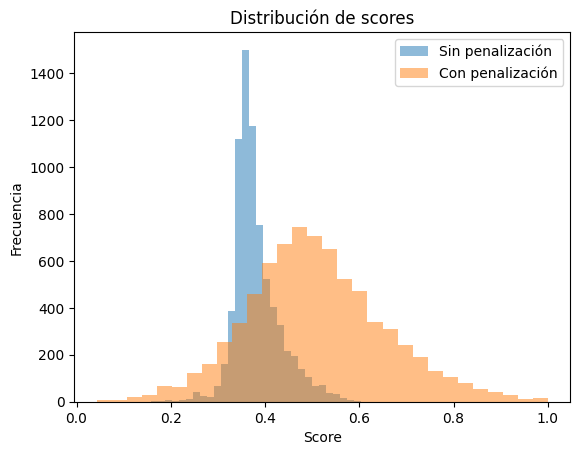

,score_con_penalizacion
count,7428.000000
mean,0.507832
std,0.145809
min,0.043264
25%,0.414554
50%,0.496938
75%,0.595666
max,1.000000


In [58]:
plt.hist(Resultados['score_sin_penalizacion'], bins=30, alpha=0.5, label='Sin penalización')
plt.hist(Resultados['score_con_penalizacion'], bins=30, alpha=0.5, label='Con penalización')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de scores')
plt.show()
display(Resultados['score_con_penalizacion'].describe())